 # Basic Statistics and Data Wrangling

## Outline 
* Lecture 1: Basic Statistics 
    * with sample use cases in ***Python***
* Lecture 2: Data Wrangling 
    * with sample use cases in ***Python***    
* Lab: Introduction to ***Pandas***
     * with use cases
     * and exercises
    

 # Basic Statistics

## Outline
* Types of Data
* Simple Statistical Characteristics
* Multivariate Statistics 
* Data Sampling
* Data Distributions


  

## Types of Data

#### Continuos Data 

*Data that can take on any value in an interval*

* also: float, numeric, interval data

#### Discrete Data

*Data that can take on only interger values*
* also: integer, count

#### Categorical Data

*Data that takes on only predefined values representing a set of categories*
* also: enums, enummerated, nomial data

#### Binary Data

* Special Case of Categorical Data with only two categories
* also boolean, logical indicator

#### Ordinal Data

* Categorical data with explicit ordering

* example: size categories: {"small","medium","large",..}

## Simple Statistical Characteristics of Data

* On the next slides, we will focus on **continuous data in a singe variable**
* In the next slides we will look at characteristics of datasets
$x$ with elements $x_1,x_2, ..., x_n$
* We use a simple data set for the python examples

In [1]:
import pandas as pd 
x = pd.read_csv('DATA/drinks.csv')

In [2]:
#quick look at the data
x.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


#### Mean
The *Mean* or *Average* is the most basic and most widly used statistical characteristic.

**Mean** of $x$ is defined as 
* "x-bar": $\quad\bar{x}:= {{\sum_{i=1}^{n} x_i}\over{n}}$

In [3]:
#mean over all beer servings
x['beer_servings'].mean()

106.16062176165804

* What does ***Mean*** tell us, what not?
* Obvious drawbacks of ***Mean***?

#### Robust versions of ***Mean***
* Trimmed Mean: $\quad\bar{x}_t:= {{\sum_{i=p}^{n-p} x_i}\over{n-2p}}$
    * remove $p$ potential outliers
    * requires sorting



* Weighted Mean: $\quad\bar{x}_w:= {{\sum_{i=1}^{n} w_ix_i}\over{\sum w_i}}$
    * weights $w_i$ given by some prior information, e.g. trust in the data source

#### Median
the median is the middle element of the sorted set $x$
* robust against single samples 
* but much more expensive to compute (need to sort)

In [4]:
#compare mean and median
x['beer_servings'].mean()

106.16062176165804

In [5]:
x['beer_servings'].median()

76.0

#### Variance
Most common meassure for variability. **Variance** is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value.

$Var(x) := \sigma^2 := {{\sum_{i=1}^n(x_i-\bar{x})²}\over{n-1}}$

In [6]:
x['beer_servings'].var()

10229.927191278055

#### Standard Deviation
is closely coupled with the **Variance**. It is denoted by $\sigma$ - hence it is simply:

$\sigma := \sqrt{\sigma^2} = \sqrt{Var(x)}$

In [7]:
x['beer_servings'].std()

101.14310253931335

#### Range
is defined as the differnce between the maximum und minimun values:

$Range(x) := max(x)-min(x)$

#### Percentile
a value such that $p$ percent of the values take on this value or less. Typical **percentile** values are 
* $p_{90}, p_{95}$ or $p_{99}$
* also called ***quantile*** for $p={25,50,75}$

In [8]:
x['beer_servings'].quantile(0.75)

188.0

#### Box-Plots
visualizing ***mean*** and ***quantile*** and ***outlier*** information:

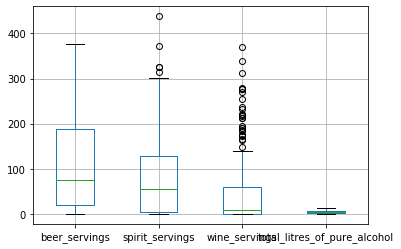

In [9]:
import matplotlib.pyplot as plt 
x.boxplot()

#### Histograms
give a discrete approximation of the data ***distribution***. The data ***range*** is split into $n$ discrete ***bins***. All data samples are assigned to a bin. The ***histogram*** visualizes the ***bin count***:   

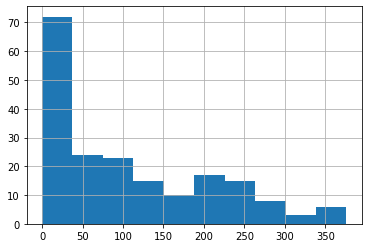

In [10]:
x['beer_servings'].hist(bins=10)

## Multivariate Statistics
So far, we only looked at the statistics of a single variable. Let's see what kind of characteristics we can get for the relation between two or more variables... 

### Covariance 
***covariance*** is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive:

$ cov(x,y) := {1\over n}\sum_i^n(x_i-\bar{x})(y_i-\bar{y})$

In [11]:
x['beer_servings'].cov(x['wine_servings'])

4249.458468264249

#### Covariance Matrix
In probability theory and statistics, a covariance matrix (often named $K_{XX}$ or $\Sigma$) is a matrix whose element in the $i, j$ position is the covariance between the $i$-th and $j$-th elements of a random vector $X$:
<img SRC="IMG/cov_mat.svg"><br><br>
where $E[X]$ is the expected value (mean)

In [12]:
#get all pair-wise covariances in a DataFrame
x.cov()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,10229.927191,4096.953962,4249.458468,318.992031
spirit_servings,4096.953962,7794.119765,1370.601306,218.184985
wine_servings,4249.458468,1370.601306,6351.707200,200.762044
total_litres_of_pure_alcohol,318.992031,218.184985,200.762044,14.237779


Often, the **covariance matrix** is also shown as an image:


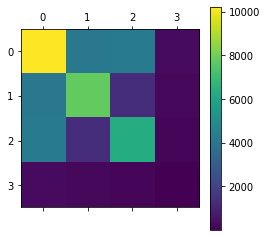

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.matshow(x.cov())
plt.colorbar()

### Correlation 
 In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. **Correlations** are useful because they can indicate a predictive relationship that can be exploited in practice. 

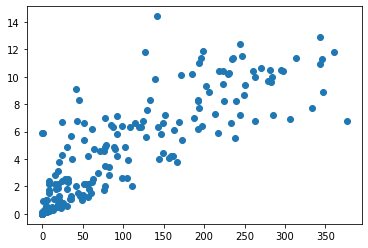

In [14]:
#scatter plots are a usefull tool to see simple (linear) correlations between variables
plt.scatter(x['beer_servings'],x['total_litres_of_pure_alcohol'])

#### Pearson's correlation coefficient
The most familiar measure of dependence between two quantities is the Pearson product-moment correlation coefficient, It is obtained by dividing the covariance of the two variables by the product of their standard deviations.

$corr(X,Y) := {cov(X,Y)\over {\sigma_X\sigma_Y}}$

* $ corr(X,Y) \in \{-1,1\}$
* symmetric: $corr(X,Y) = corr(Y,X)$

#### Correlation Matrix

In [15]:
x.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


#### Correlation and Causality 
**Important**: it's common mistake to over interpret $corr(A,B)$ as causality: $A\rightarrow B$ ($A$ causes $B$). In fact: 

* if $A\rightarrow B$, then $corr(A,B)$ has to have high value (necessary condition) 
    
* but, from a high $corr(A,B)$ value, we can not conclude $A\rightarrow B$ (sufficient condition)


#### Simpson's Paradox
Simpson's paradox is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. 

* Cause of this problem: correlation computed on random variables under the assumption that there are ***fairly*** drawn 
* no sub groups with different properties!

**Example**

Admission statistics of a university:

<img SRC="IMG/simpson_1.png">

Taking a closer look:

<img SRC="IMG/simpson_2.png">

### Further Multivariate Statistics
More advanced techniques we will see later:
* Principal Component Analysis
* Linear Discriminant Analysis (LDA)
* Clustering 
* ...

## Data Sampling


* How to sample data for experiments ?
* How much data do I need ?
* But I have **BIG DATA** - do I still have to sample? 

###  Terms
* **Sample**: a subset of a larger data set
* **Population**: the large (full) data set - or at least the model for it
* **Random Sample**: Drawing samples at random
* **Stratified sampling**: Dividing samples into ***strata*** (groups with shared properties) and sample from them 
* **Sample Bias** A sample that has different statistics from the population

#### Sampling bias


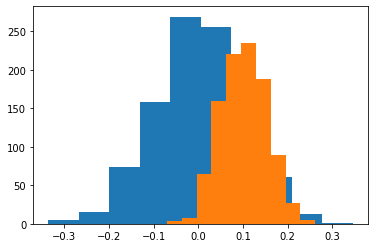

In [16]:
import numpy as np
population = np.random.normal(0, 0.1, 1000)
sample = np.random.normal(0.1, 0.05, 1000)
a=plt.hist(population)
b=plt.hist(sample)

#### Rules for **random** sampling
True random sampling can be very hard to realize in practice.

* define theoretically possible  **populations**
    * what external effects could influence thee population  (e.g. different sources)
    * need context knowledge on the data source!
* compare basic statistics of different samplings (Mean, Variance, ...) $\rightarrow$ is it stable?
    * but this will require more data ...

### Bootstrap
A ***Bootstrap Sample*** is sample which has been taken with ***replacement***.

* ***replacement***: a data point can be drawn more then once
* algorithm:
    * Step 1: sample $n$ data points with replacement $\rightarrow$ save sample as **bag**
    * Step 2: compute statistics (e.g. mean, variance)
    * repeat 1+2 and observe statistics of different bags
* effect of ***bootstrap***:
    * allows robust estimation of unknown distributions
* later for prediction: use ***bagging*** (:= average over models trained on many bags) 

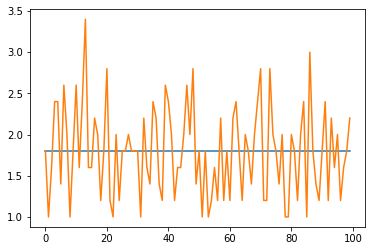

In [17]:
import numpy as np
l = np.array([1, 2, 1, 4, 1])
means = np.zeros(100)
bootstrap_means = np.zeros(100)
for i in range(100): 
    means[i]= np.random.choice(l, size=l.shape, replace=False).mean()
    bootstrap_means[i] = np.random.choice(l, size=l.shape, replace=True).mean()
plt.plot(means)
plt.plot(bootstrap_means)

## Data (Sample) Distributions

### Normal (or Gauss) Distribution
<img SRC="IMG/normal.png" width=1000>
[source: wikipedia]

### Normal Distribution
<img SRC="IMG/normal_dist.PNG" width=800>
[source: wikipedia]

#### Testing for a Normal Distribution
The assumption that data follows a ***normal distribution*** is 
* a necessary condition for many analysis methods
* but rarely secure for real data 

**How to test if my data has a normal distribution**?

#### QQ-Plots
In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.


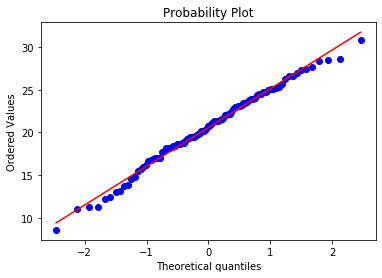

In [18]:
import scipy.stats as stats
import numpy as np
import pylab
measurements = np.random.normal(loc = 20, scale = 5, size=100)  #sampling a normal dist 
res=stats.probplot(measurements, dist="norm", plot=pylab)

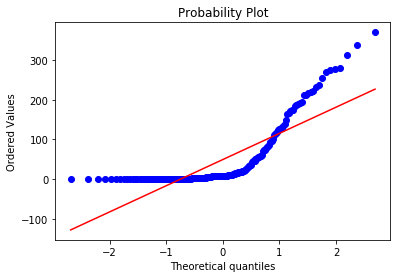

In [19]:
res=stats.probplot(x['wine_servings'], dist="norm", plot=pylab)

### Central Limit Theorem
the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.<br><br>
<img SRC="IMG/central.png" width=1000>
[source: wikipedia]

### Other relevant distributions:
* Binomial Distribution
* Poisson Distribution

# Data Wrangling

## Outline
* Data Science Processing Pipeline
* What is ***Data Wrangling***? 
    * Stages of ***Data Wrangling***
* Short Introduction to ***Pandas***
* ***Wrangling*** by Use Cases (Lab session)

## What is ***Data Wrangling*** ?

### Definition: 


**Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. [wikipedia]**


<img src="IMG/wrangle.jpg" width=1200>
<font size=4>[source: study by forbes.com: https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#]</font>

### Phases of ***Data Wrangling***

* (Scrape)
* Clean
* Transform
* Merge
* Reshape -> Rectify

### Phases of ***Data Wrangling***

* (Scrape): ***get data from sensors, internet, databases, ...*** 
* Clean
* Transform
* Merge
* Reshape -> Rectify

### Phases of ***Data Wrangling***

* (Scrape)
* Clean : ***remove "bad data"***
* Transform
* Merge
* Reshape -> Rectify

### Phases of ***Data Wrangling***

* (Scrape)
* Clean
* Transform : ***change/correct data formats, recompute, ...***
* Merge
* Reshape -> Rectify


### Phases of ***Data Wrangling***

* (Scrape)
* Clean
* Transform
* Merge: ***combine and connect data sources***
* Reshape -> Rectify

### Phases of ***Data Wrangling***

* (Scrape)
* Clean
* Transform
* Merge
* Reshape -> Rectify: ***output: vectors, arrays, tables***

## ***Wrangling*** in Python with Pandas
Started as ***"spread sheets for python"*** - now has become one of the most important ***Data Wrangling*** and **EDA** tools in ***Python***<BR>
<img src="IMG/pandas_logo.png">

***pandas*** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like **R**.[pandas website]




### Pandas Documentation
* Pandas website:  https://pandas.pydata.org/
* Pandas user guide: http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html
* Pandas API documentation: http://pandas.pydata.org/pandas-docs/stable/reference/index.html
* VERY USEFULL: Pandas Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

### Pandas in a Nutshell


In [20]:
#import the pandas module
import pandas as pd #naming convention for pandas is pd

#### The central element of ***Pandas*** is the ***DataFrame***
* spreadsheet like data structure
* rectifies data into tables
* database like functionality
* arrray compatible

In [21]:
d=pd.read_csv('DATA/weather.csv') #read some data from file
d.head()#show first rows of the DataFrame

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### Pandas Features
* Data in- and export
* DataFrame (DF) data structure with functionality of
    * spreadsheet
    * relational data base
* DF Statistcs
* DF Visualization
* Rich library of ***wrangling*** methods

#### <font color="red">Detailted introduction in the Lab session! </font>
* With wrangling use cases ...